In [11]:
import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

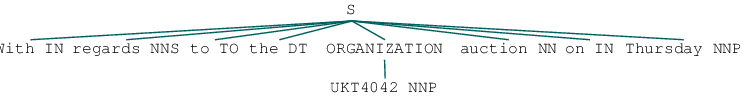

In [2]:
#dir(nltk.tokenize)
s1 = "Pearson shares dive 27 after profit warning"
s2 = "Upcoming gilt should go well"
s3 = "Upcoming gilt auction should go well"
s4 = "Upcoming UKT 4042 auction should go well"
s5 = "With regards to the UKT4042 auction on Thursday"

g1 = nltk.pos_tag(nltk.tokenize.word_tokenize(s1))
g2 = nltk.pos_tag(nltk.tokenize.word_tokenize(s2))
g3 = nltk.pos_tag(nltk.tokenize.word_tokenize(s3))
g4 = nltk.pos_tag(nltk.tokenize.word_tokenize(s4))
g5 = nltk.pos_tag(nltk.tokenize.word_tokenize(s5))
#print(g1)
nltk.ne_chunk(g5, binary=False)

In [3]:
#def ie_preprocess(document):
#...    sentences = nltk.sent_tokenize(document) [1]
#...    sentences = [nltk.word_tokenize(sent) for sent in sentences] [2]
#...    sentences = [nltk.pos_tag(sent) for sent in sentences] [3]

In [4]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)
#subj_docs[0]
#obj_docs[1]

/Users/david/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


(100, 100)

'Each document is represented by a tuple (sentence, label). 
'The sentence is tokenized, so it is represented by a list of strings:

'' subj_docs[0]
''(['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one',
'thing', 'is', 'a', 'small', 'gem', '.'], 'subj')
'We separately split subjective and objective instances to keep a 
'balanced uniform class distribution in both train and test sets.

In [42]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

testwords = [mark_negation(training_docs[9])]
 
 
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
print(all_words_neg[:20])

['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one', 'thing', 'is', 'a', 'small', 'gem', '.', 'color', ',', 'musical', 'bounce', 'and', 'warm']


In [44]:
#We use simple unigram word features, handling negation
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
bigram_feats = sentim_analyzer.bigram_word_feats(all_words_neg, min_freq=4)
#len(unigram_feats)
#83
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

print(extract_unigram_feats(all_words_neg[:20], unigrams=unigram_feats))
print(extract_bigram_feats(all_words_neg[:20], unigrams=unigram_feats))
#We apply features to obtain a feature-value representation of our datasets:

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

AttributeError: 'SentimentAnalyzer' object has no attribute 'bigram_word_feats'

In [7]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
#Training classifier
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
#sentences = ["VADER is smart, handsome, and funny.", # positive sentence example


In [32]:
sentences = []
paragraph = "The upcoming index linked gilt auction should go well. The gilt market has been performing brilliantly of late\
 and we expect this to continue. The next auction is going to be a blow out"
from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)


In [33]:
#sentences.extend(tricky_sentences)
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

The upcoming index linked gilt auction should go well.
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 
The gilt market has been performing brilliantly of late and we expect this to continue.
compound: 0.6124, neg: 0.0, neu: 0.778, pos: 0.222, 
The next auction is going to be a blow out
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
